In [1]:
import pandas as pd

titanic_df = pd.read_csv('titanic.csv')
titanic_df.info()
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                           

C:\Users\rahul\AppData\Local\Temp\ipykernel_24188\3777354957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
def detect_outliers(data,variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

outliers_age = detect_outliers(titanic_df,'Age')
outliers_fare = detect_outliers(titanic_df,'Fare')

print("Outliers in Age:")
print(outliers_age[['Age']])
print("\nOutliers in Fare:")
print(outliers_age[['Fare']])

titanic_df_cleaned = titanic_df[~titanic_df.index.isin(outliers_age.index)]
titanic_df_cleaned = titanic_df[~titanic_df.index.isin(outliers_fare.index)]

print(titanic_df_cleaned.head())

Outliers in Age:
     Age
81  67.0
96  76.0

Outliers in Fare:
        Fare
81  221.7792
96   78.8500
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875  

In [13]:
def detect_outliers(data,variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

outliers_age = detect_outliers(titanic_df,'Age')
outliers_fare = detect_outliers(titanic_df,'Fare')
outliers_sibsp = detect_outliers(titanic_df,'SibSp')
outliers_parch = detect_outliers(titanic_df,'Parch')

titanic_df_cleaned = titanic_df[~titanic_df.index.isin(outliers_age.index)]
titanic_df_cleaned = titanic_df[~titanic_df.index.isin(outliers_fare.index)]
titanic_df_cleaned = titanic_df[~titanic_df.index.isin(outliers_sibsp.index)]
titanic_df_cleaned = titanic_df[~titanic_df.index.isin(outliers_parch.index)]

print("Outliers in Age:")
print(outliers_age[['Age']])
print("\nOutliers in Fare:")
print(outliers_age[['Fare']])
print("\nOutliers in Parch:")
print(outliers_age[['Parch']])
print("\nOutliers in SibSp:")
print(outliers_age[['SibSp']])
print(titanic_df_cleaned)

Outliers in Age:
     Age
81  67.0
96  76.0

Outliers in Fare:
        Fare
81  221.7792
96   78.8500

Outliers in Parch:
    Parch
81      0
96      0

Outliers in SibSp:
    SibSp
81      1
96      1
     PassengerId  Survived  Pclass                              Name     Sex  \
0            892         0       3                  Kelly, Mr. James    male   
1            893         1       3  Wilkes, Mrs. James (Ellen Needs)  female   
2            894         0       2         Myles, Mr. Thomas Francis    male   
3            895         0       3                  Wirz, Mr. Albert    male   
5            897         0       3        Svensson, Mr. Johan Cervin    male   
..           ...       ...     ...                               ...     ...   
412         1304         1       3    Henriksson, Miss. Jenny Lovisa  female   
413         1305         0       3                Spector, Mr. Woolf    male   
414         1306         1       1      Oliva y Ocana, Dona. Fermina  female  

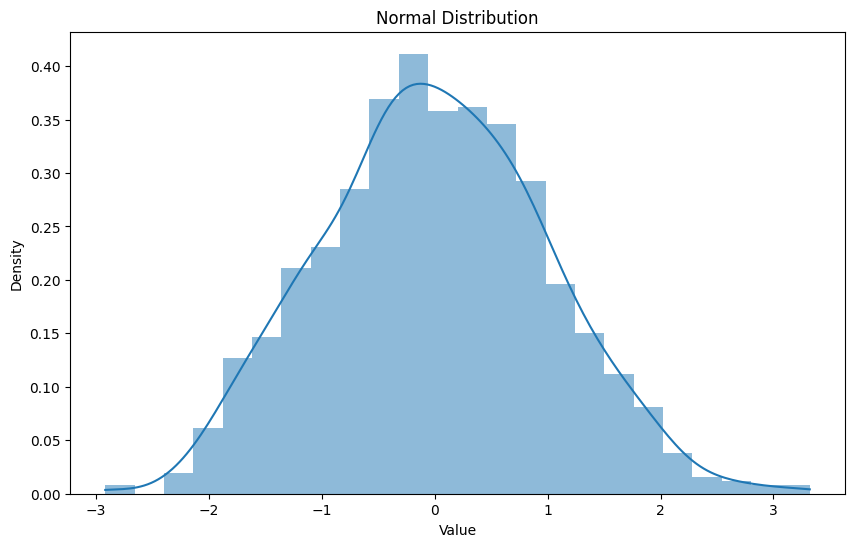

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mu, sigma = 0,1

data = np.random.normal(mu,sigma,1000)

plt.figure(figsize=(10,6))
sns.histplot(data, kde=True, stat="density", linewidth = 0)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

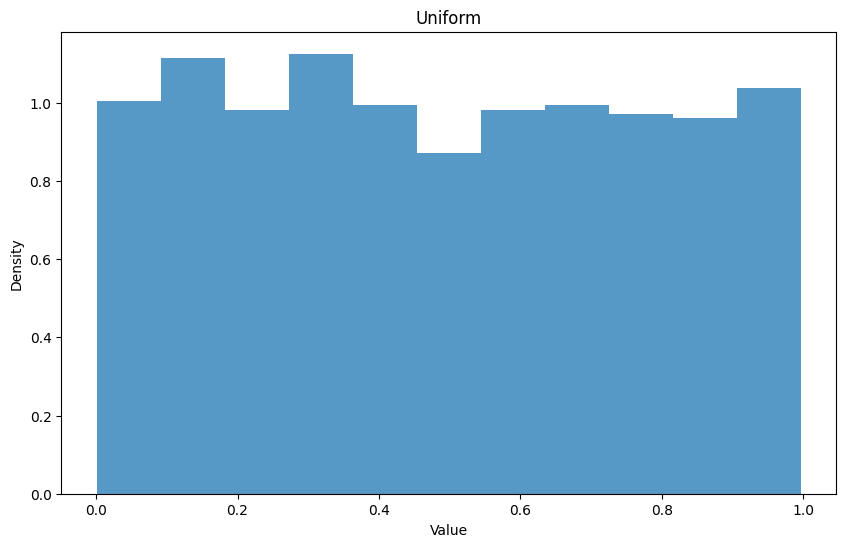

In [16]:
from scipy.stats import uniform
loc, scale = 0,1
data = np.random.uniform(loc,scale,1000)

plt.figure(figsize=(10,6))
sns.histplot(data,kde=False, stat = "density", linewidth=0)
plt.title('Uniform')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

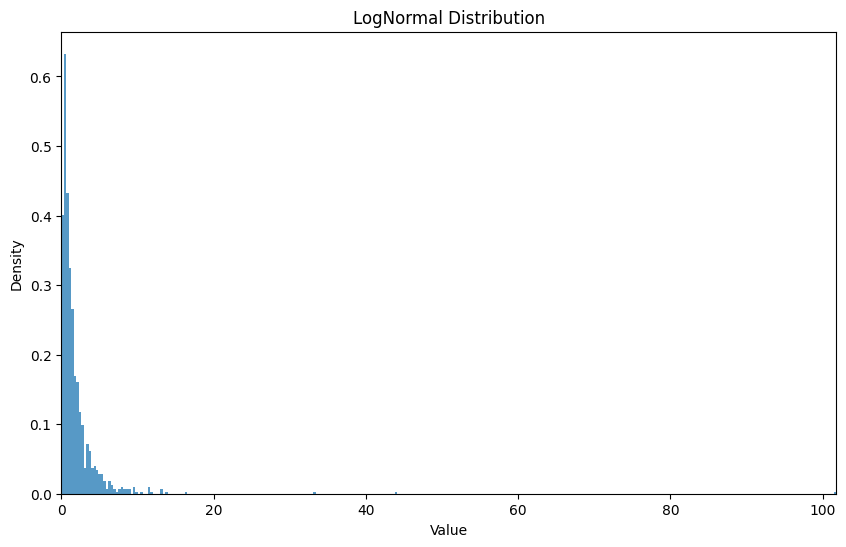

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import lognorm
import seaborn as sns

mean = 0
sigma = 1

data = np.random.lognormal(mean,sigma,1000)

plt.figure(figsize=(10,6))
sns.histplot(data,kde=False, stat = "density", linewidth=0)
plt.title('LogNormal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0,max(data))
plt.show()

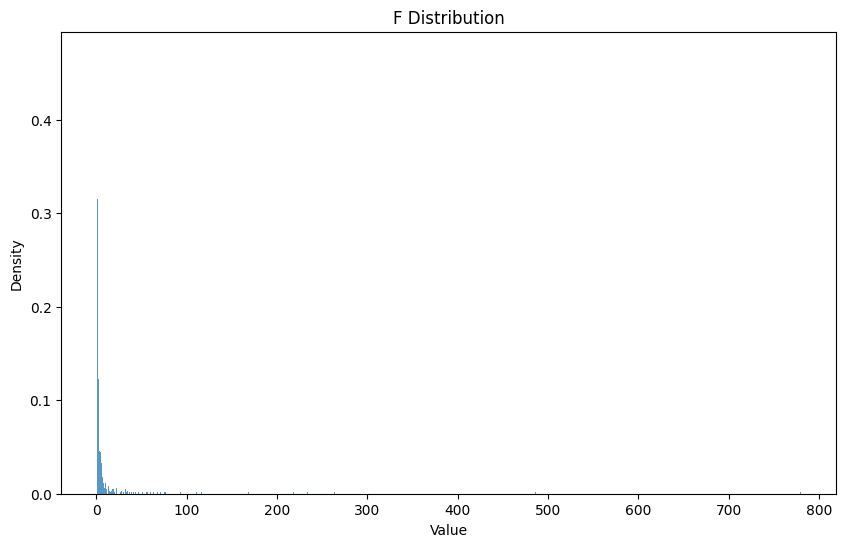

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import f
import seaborn as sns

dfn, dnd = 5,2

data = np.random.f(dfn,dnd, 1000)

plt.figure(figsize=(10,6))
sns.histplot(data,kde=False, stat = "density", linewidth=0)
plt.title('F Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

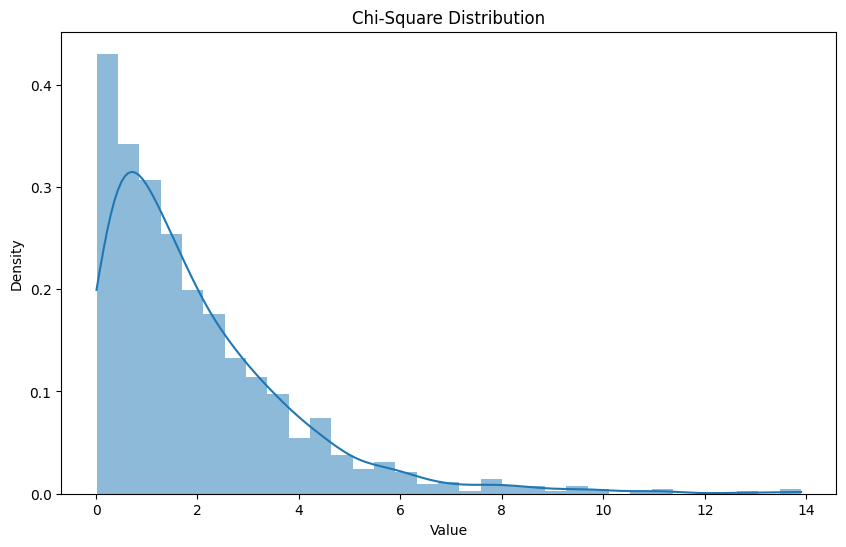

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import chi2
import seaborn as sns

df = 2

data = np.random.chisquare(df,1000)

plt.figure(figsize=(10,6))
sns.histplot(data,kde=True, stat = "density", linewidth=0)
plt.title('Chi-Square Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

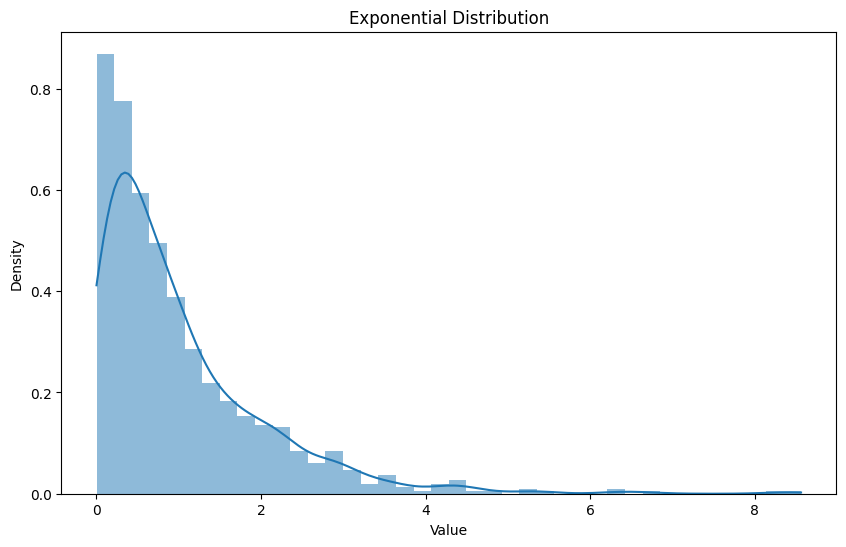

In [18]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import expon
import seaborn as sns

scale = 1

data = np.random.exponential(scale,1000)

plt.figure(figsize=(10,6))
sns.histplot(data,kde=True, stat = "density", linewidth=0)
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()